# Desarrollo Proyecto 7008, ViT [Testeo visual]

Angelo Muñoz

# Readme:
Adjuntar estos archivo a "mi unidad" en su drive.

[datos.zip](https://drive.google.com/file/d/1TaQCJFK5sB1nfLM9eZuDllPdRayfAwJr/view?usp=sharing)

[archivos_txt](https://drive.google.com/file/d/19DDb9JtURg1UHICc-7EBd4KkVmJY39NQ/view?usp=sharing)

[df_test_clean](https://drive.google.com/file/d/1nJlicgCFtwr0PRPjzuFCPm6TK6JcxR1g/view?usp=drive_link)

[df_train_clean](https://drive.google.com/file/d/1kRofdUPHObkdMCeo0MRcJTKG9s0e5DDx/view?usp=sharing)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Modelos a evaluar:
Los siguientes links tienen archivos a los modelos entrenados para su evaluación, al igual que para los datos, es necesario añadirlos a  "mi unidad" en su drive para realizar el test:

[Experimento_1,82 clases](https://drive.google.com/file/d/1-f7CV1-G7R0J1VqToe4ogYoTsC31n72O/view?usp=sharing)

[Experimento_2,82 clases](https://drive.google.com/file/d/1-4isWjziboZAzrFLHKdF90Uv5DyMhKiy/view?usp=sharing)

[Experimento_3,82 clases](https://drive.google.com/file/d/17FQIyWnxBavJ0VGtQ5mewasUMdzomDDG/view?usp=sharing)


[Experimento_2,20 clases](https://drive.google.com/file/d/1UZKbNbFDedlI1JnW6Quw44edvfQi8x67/view?usp=sharing)

[Experimento_3,20 clases](https://drive.google.com/file/d/1-ItxcaCckLh5gLfI9yI1ptJd_5S8V8xG/view?usp=sharing)

[Experimento_3, 6 clases](https://drive.google.com/file/d/17FQIyWnxBavJ0VGtQ5mewasUMdzomDDG/view?usp=sharing)



## Cargando la data:

In [ ]:
# Crear una carpeta llamada "dataset" en la ruta /content/
!mkdir -p /content/dataset/

# Descomprimir el archivo en la carpeta recién creada
!unzip /content/drive/MyDrive/Images.zip -d /content/dataset/

#creando carpeta para los txt
!mkdir -p /content/textos/
# Descomprimiendolos
!unzip /content/drive/MyDrive/Yoga-82.zip -d /content/textos/


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_52.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_53.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_54.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_55.jpg  
 extracting: /content/dataset/Images/Supta_Virasana_Vajrasana/4_56.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_57.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_58.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_61.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_65.jpg  
 extracting: /content/dataset/Images/Supta_Virasana_Vajrasana/4_66.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_67.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_68.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4

## Imports

In [ ]:
pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 924.0 kB/s eta 0:00:00


In [ ]:
import sys
!git clone https://github.com/FrinyildV/EL7008_ViT_tf_ammc VIT_imp
sys.path.append("VIT_imp")


Cloning into 'VIT_imp'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 42 (delta 9), reused 42 (delta 9), pack-reused 0
Receiving objects: 100% (42/42), 8.10 KiB | 8.10 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
from VIT_imp.funciones.auxiliares import *
from VIT_imp.modelo.vit import *

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from tqdm import tqdm, trange

import cv2

import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader

from torchvision.transforms import ToTensor
from torchvision.datasets.mnist import MNIST

np.random.seed(0)
torch.manual_seed(0)



from torch import Tensor
from einops import rearrange , reduce, repeat
from einops.layers.torch import Rearrange, Reduce

from sklearn.model_selection import train_test_split

from sklearn import metrics as metsk
import matplotlib.pyplot as plt

from torchsummary import summary


## Data limpia:

In [ ]:

# headers=['ruta','clases_6','clases_20','clases_82']
path_clean_train = '/content/drive/MyDrive/df_train_clean.csv'
path_clean_test = '/content/drive/MyDrive/df_test_clean.csv'
df_train=pd.read_csv(path_clean_train)
df_test=pd.read_csv(path_clean_test)

# Evaluación y testeos:

## Parámetros:

In [ ]:
# metricas para 224 x 224
mean_train = torch.tensor([0.6265, 0.6526, 0.6734])
std_train = torch.tensor([0.3381, 0.3223, 0.3225])
resize_dim =(224,224)

In [ ]:
import os
#%%%%%%%%% listas con labels:
base_folder = '/content/dataset/Images/'
label_names_82 = os.listdir(base_folder)
label_names_82.remove('.DS_Store')

label_names_6 = ['standing', 'sitting', 'balancing', 'inverted', 'reclining', 'wheel']
label_names_20= [
    'standing_straight', 'standing_forward bend', 'standing_side bend', 'standing_others',
    'sitting_normal1', 'sitting_normal2', 'sitting_split', 'sitting_forward bend', 'sitting_twist',
    'balancing_front', 'balancing_side', 'inverted_legs straight up', 'inverted_legs bend',
    'reclining_up-facing', 'reclining_down-facing', 'reclining_side-facing', 'reclining_plank balance',
    'wheel_up-facing', 'wheel_down-facing', 'wheel_others'
]

In [87]:
import warnings
warnings.filterwarnings('ignore')
def graficar_y_evaluar(modelo,indices_imagenes,clases,clases_ref):
  #%%%%%%% creando conjunto de validación: %%%%%%%%%
  clases=clases
  resize_dim=(224,224)
  path_ruta_images = '/content/dataset/Images/'
  transform_val_test = transforms.Compose([
      # transforms.ToPILImage(),
      transforms.ToTensor(),  # Convierte la imagen a un tensor
      transforms.Resize(resize_dim),
      transforms.Normalize(mean_train, std_train),
  ])

  for indice in indices_imagenes:
    # df_t = df_test.iloc[indice]
    df_t = pd.DataFrame(df_test.loc[df_test.index[indice]]).T
    img_path = path_ruta_images + df_t['ruta'].iloc[0]
    imagen = cv2.imread(img_path)
    cv2_imshow(imagen)
    indice_clase = df_t[f"clases_{clases}"].iloc[0]
    clase_image = clases_ref[indice_clase]

    print(f'clase: {clase_image}; de label: {indice_clase}')
    #%%%%%%%%%%%%%%%%%

    dataset_test = Lector(data=df_t, modo=clases, ruta_images=path_ruta_images, transform=transform_val_test)
    batch_size_n = len(indices_imagenes)  # ajusta según sea necesario #800
    test_loader = DataLoader(dataset_test, batch_size=batch_size_n, shuffle=False)
    with torch.no_grad():
      # predict = model(dataset_test[0])
      for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, preds = torch.max(outputs, 1)
    print(f'Clase predicha: {clases_ref[preds[0]]} de Label predicho: {preds[0]} ')


In [89]:
# summary(model_tf,(3,224,224))

# Ej con un modelo de 82 clases:

In [90]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ruta_modelo = '/content/drive/MyDrive/exp_1_chk_82.pth'# ruta con el modelo a evaluar
clases_orig=82 #numero de clases con que el modelo fue entrenado
model = ViT((3, 224, 224), n_patches=14, n_blocks=12, \
              hidden_d=768, n_heads=12, out_d=clases_orig)
network_state_dict = torch.load(ruta_modelo)
model.load_state_dict(network_state_dict)
model = model.to(device)


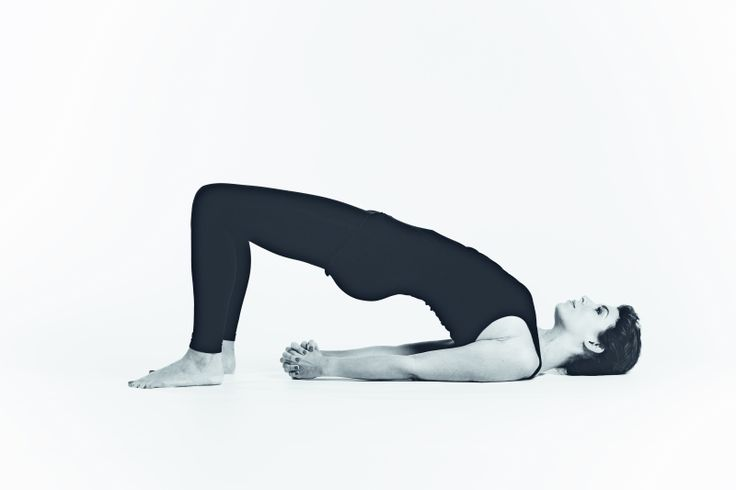

clase: Locust_Pose_or_Salabhasana_; de label: 5
Clase predicha: Plank_Pose_or_Kumbhakasana_ de Label predicho: 22 


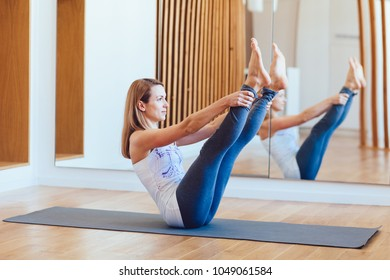

clase: Noose_Pose_or_Pasasana_; de label: 2
Clase predicha: Staff_Pose_or_Dandasana_ de Label predicho: 47 


In [94]:
# indices_a_evaluar=[1,2]
np.random.seed(0)
indices_a_evaluar = np.random.randint(0,len(df_test),2)
graficar_y_evaluar(modelo=model,indices_imagenes=indices_a_evaluar,clases=clases_orig,clases_ref=label_names_82)

## Ej con un modelo de 6 clases:

In [95]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ruta_modelo = '/content/drive/MyDrive/exp_3_chk_6.pth'# ruta con el modelo a evaluar
clases_orig=6 #numero de clases con que el modelo fue entrenado
model = ViT((3, 224, 224), n_patches=14, n_blocks=12, \
              hidden_d=768, n_heads=12, out_d=clases_orig)
network_state_dict = torch.load(ruta_modelo)
model.load_state_dict(network_state_dict)
model = model.to(device)

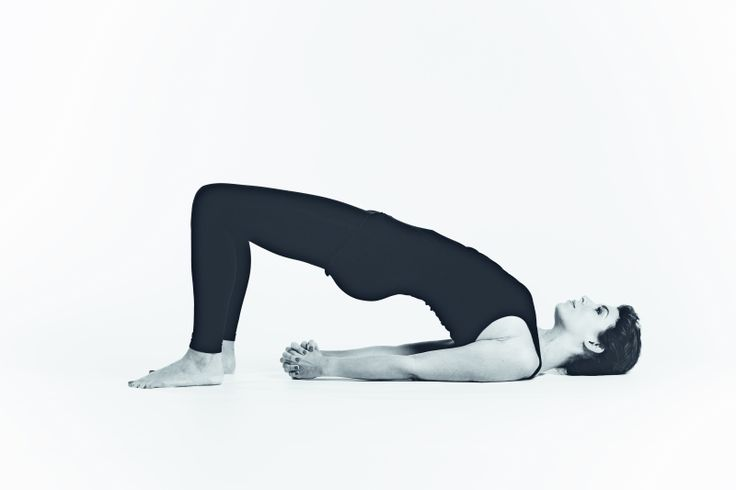

clase: wheel; de label: 5
Clase predicha: standing de Label predicho: 0 


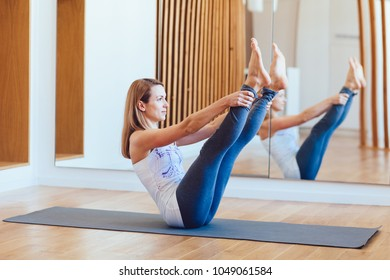

clase: wheel; de label: 5
Clase predicha: standing de Label predicho: 0 


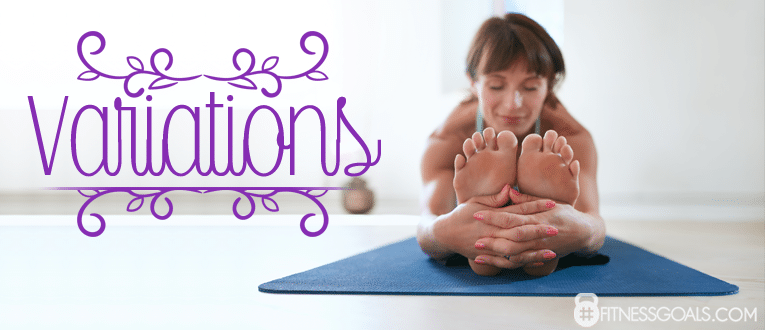

clase: sitting; de label: 1
Clase predicha: reclining de Label predicho: 4 


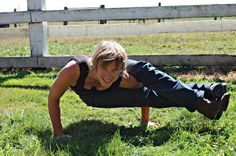

clase: balancing; de label: 2
Clase predicha: standing de Label predicho: 0 


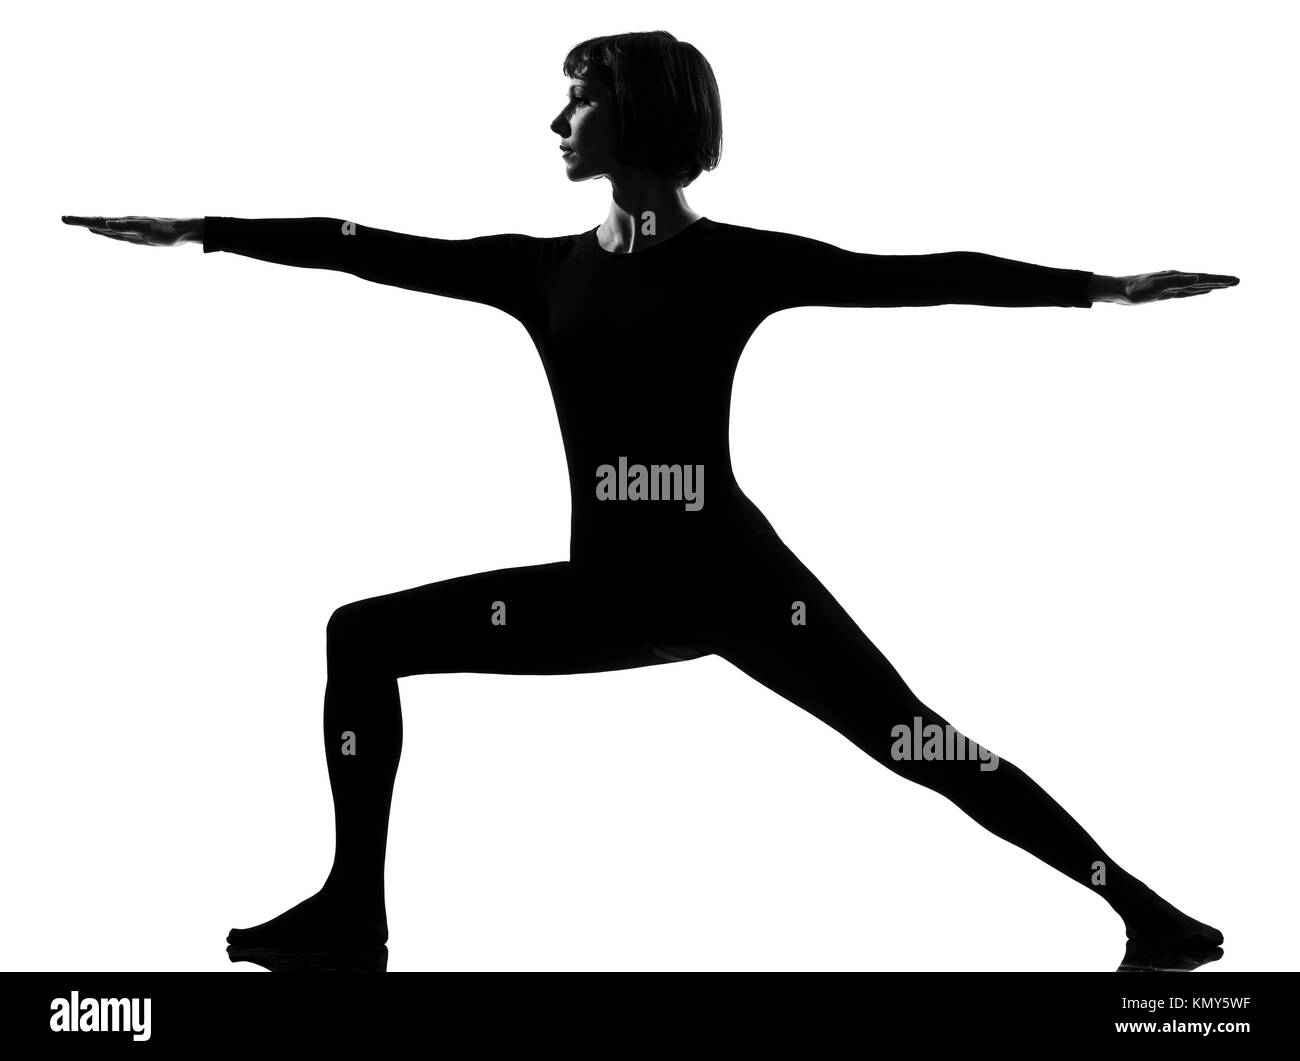

clase: standing; de label: 0
Clase predicha: standing de Label predicho: 0 


In [97]:
# indices_a_evaluar=[1,2]
np.random.seed(0)
indices_a_evaluar = np.random.randint(0,len(df_test),5)
graficar_y_evaluar(modelo=model,indices_imagenes=indices_a_evaluar,clases=clases_orig,clases_ref=label_names_6)